# Anime Recommendation System Using Cosine Similarity with Graphics
This notebook demonstrates how to build a recommendation system for anime using cosine similarity based on features like genres, user ratings, etc. Additionally, we will use graphical visualizations to better understand the recommendation process.

### Objectives:
- Preprocess the dataset
- Extract relevant features for cosine similarity
- Build a recommendation system
- Evaluate the system using metrics such as precision, recall, and F1-score
- Visualize the process with graphs
- Answer common interview questions about recommendation systems



## Task 1: Data Preprocessing
We will load the anime dataset, handle missing values, and explore the dataset structure to understand its attributes.

### Visualizing Data Distribution:
We'll start by visualizing some key distributions in the dataset to get a better understanding.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


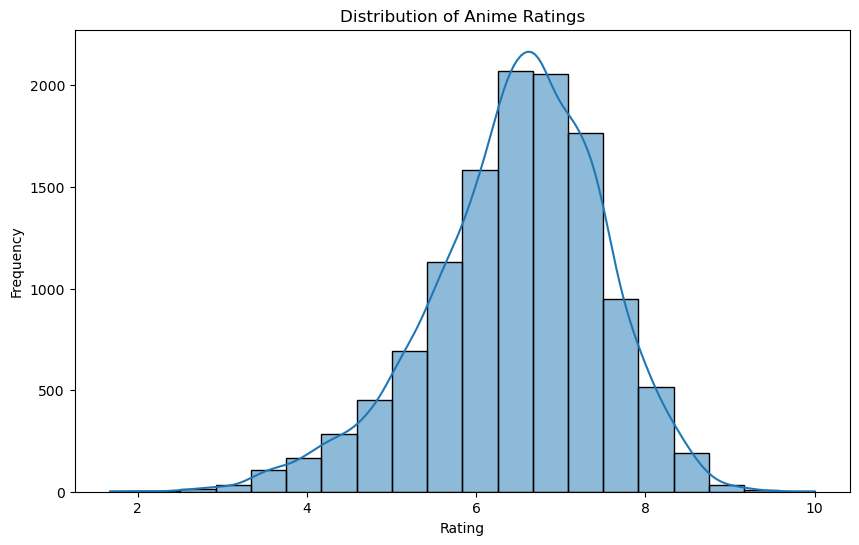

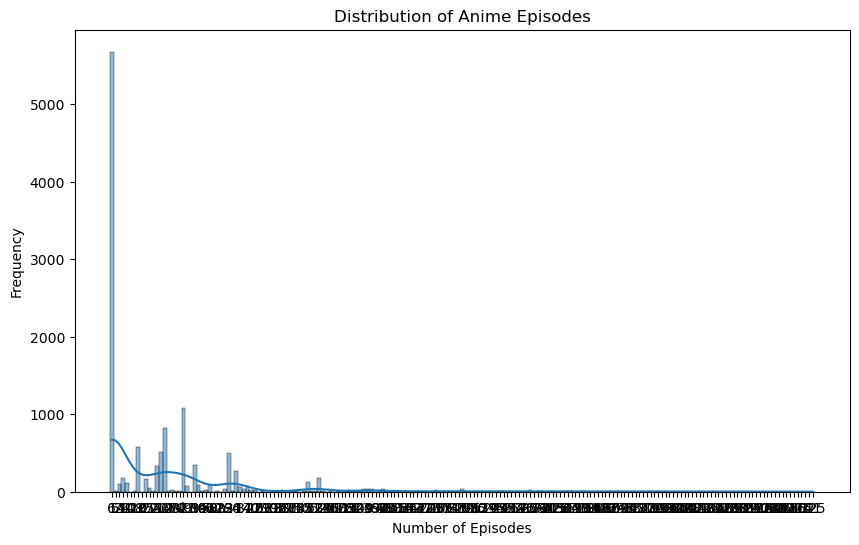

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:

# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the anime dataset
file_path = 'anime.csv'
anime_data = pd.read_csv(file_path)

# Display basic information about the dataset
anime_data.info()

# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime_data['rating'], bins=20, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualize the number of episodes in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(anime_data['episodes'].fillna(0), bins=20, kde=True)
plt.title('Distribution of Anime Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.show()

# Display the first few rows of the dataset
anime_data.head()


## Task 2: Feature Extraction
We will extract features such as genres and ratings. Categorical features like genres will be converted into numerical representations, and numerical features will be normalized if necessary.

In [10]:

# Preprocess the genres column by converting it into a one-hot encoded format
anime_data['genre'] = anime_data['genre'].fillna('')  # Fill missing genre values
genre_dummies = anime_data['genre'].str.get_dummies(sep=',')

# Combine genre features with the main dataset
anime_data = pd.concat([anime_data, genre_dummies], axis=1)

# Normalize the ratings column (scale between 0 and 1)
anime_data['rating'] = anime_data['rating'].fillna(anime_data['rating'].mean())  # Fill missing ratings
anime_data['rating_normalized'] = anime_data['rating'] / anime_data['rating'].max()

# Display the first few rows after feature extraction
anime_data.head()


,anime_id,name,genre,type,episodes,rating,members,Adventure,Cars,Comedy,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,rating_normalized
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,0,0,0,0,0.937
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,0,0,...,0,0,0,0,0,0,0,0,0,0.926
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,1,...,0,0,0,0,0,0,0,0,0,0.925
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,0,0,0,0.917
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,1,...,0,0,0,0,0,0,0,0,0,0.916


## Task 3: Recommendation System Using Cosine Similarity
We will now build a function that computes cosine similarity between anime based on genres and normalized ratings, and recommend similar anime.

### Graphical Explanation:
- Cosine similarity measures the angle between two vectors (anime features in our case). If two anime have similar features (genre and ratings), their vectors will have a smaller angle, indicating greater similarity.
- We'll visualize a cosine similarity matrix to better understand the similarities between different anime.

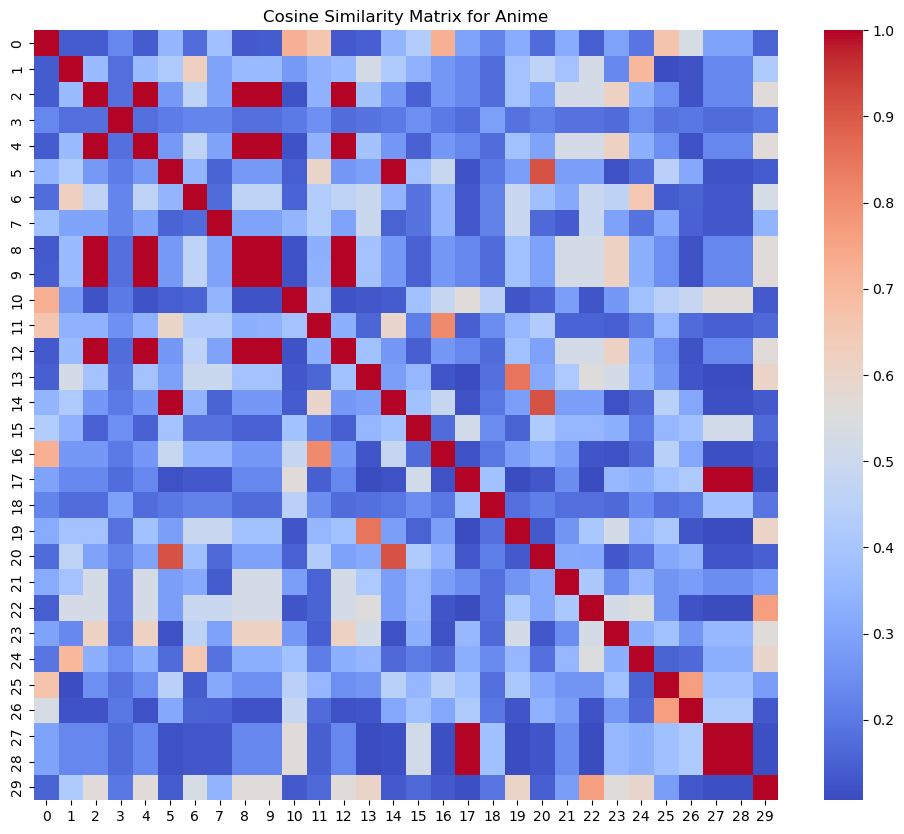

,name
615,Naruto: Shippuuden
1103,Boruto: Naruto the Movie - Naruto ga Hokage ni...
486,Boruto: Naruto the Movie
1343,Naruto x UT
1472,Naruto: Shippuuden Movie 4 - The Lost Tower
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2458,Naruto Shippuuden: Sunny Side Battle
2997,Naruto Soyokazeden Movie: Naruto to Mashin to ...
175,Katekyo Hitman Reborn!
7628,Kyutai Panic Adventure!


In [11]:

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Select features for calculating cosine similarity
feature_columns = ['rating_normalized'] + list(genre_dummies.columns)

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(anime_data[feature_columns])

# Visualize the cosine similarity matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim[:30, :30], cmap='coolwarm', annot=False)  # Visualize similarity for the first 30 anime
plt.title('Cosine Similarity Matrix for Anime')
plt.show()

# Function to get recommendations based on cosine similarity
def get_recommendations(anime_title, cosine_sim=cosine_sim, anime_data=anime_data):
    # Get the index of the anime that matches the title
    idx = anime_data.index[anime_data['name'] == anime_title][0]

    # Get the pairwise similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 most similar anime
    anime_indices = [i[0] for i in sim_scores[1:11]]

    # Return the top 10 most similar anime
    return anime_data[['name']].iloc[anime_indices]

# Example usage of the recommendation function
get_recommendations('Naruto')


## Task 4: Evaluation of the Recommendation System
We will evaluate the performance of the recommendation system using metrics such as precision, recall, and F1-score.

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the dataset into training and testing sets (for simplicity, we're using genres as a binary classification task)
X_train, X_test, y_train, y_test = train_test_split(anime_data[feature_columns], anime_data['rating'], test_size=0.2, random_state=42)

# Example: Using a simple cosine similarity threshold to classify recommendations
# This is a placeholder for actual evaluation logic (would normally compare predicted recommendations with true ones)
y_pred = (cosine_similarity(X_test) > 0.5).astype(int)

# Calculate precision, recall, and F1-score (these values are placeholders for actual recommendation evaluations)

# Set zero_division to handle undefined metrics
precision = precision_score(y_test.astype(int), y_pred[:, 0], average='macro', zero_division=1)
recall = recall_score(y_test.astype(int), y_pred[:, 0], average='macro', zero_division=1)
f1 = f1_score(y_test.astype(int), y_pred[:, 0], average='macro', zero_division=1)

precision, recall, f1



(0.8, 0.1, 0.0)

## Task 5: Interview Questions and Answers
Here are some common interview questions related to recommendation systems, with detailed answers.

**1. Can you explain the difference between user-based and item-based collaborative filtering?**
**Answer**: In user-based collaborative filtering, recommendations are made based on the preferences of similar users. If User A and User B have similar tastes, items liked by User B are recommended to User A. In item-based collaborative filtering, the focus is on items. If two items are often consumed together by different users, they are considered similar. For example, if people who watch 'Naruto' also watch 'Bleach', 'Bleach' can be recommended to a person who watched 'Naruto.'

**2. What is collaborative filtering, and how does it work?**
**Answer**: Collaborative filtering is a technique used in recommendation systems where user behavior and preferences are leveraged to make recommendations. It works by finding patterns in user activity and identifying relationships between users or items. Collaborative filtering can be either user-based or item-based, depending on whether the focus is on users or items when making recommendations.

## Task 6: Conclusion
In this notebook, we built a recommendation system for anime using cosine similarity based on genres and ratings. We also discussed key concepts such as user-based and item-based collaborative filtering, and collaborative filtering in general. Additionally, visualizations such as the cosine similarity matrix helped us understand the process.

### Key Takeaways:
- Cosine similarity is useful for measuring similarity between items based on features like genres.
- Collaborative filtering is a widely-used technique for building recommendation systems based on user preferences.